###### Assessment - Answers

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':'1xsE67od9nITvMHukJbKTqqrotXU-xQhs'})
downloaded.GetContentFile('college_1.csv') 
downloaded = drive.CreateFile({'id':'1h9rAZT2VfLEfgfhoTEIwpTmKMu10niZ9'})
downloaded.GetContentFile('college_2.csv') 

###### import necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [7]:
data1 = pd.read_csv('college_1.csv')
data2 = pd.read_csv('college_2.csv')
df = pd.concat([data1, data2], sort = False, ignore_index = True)
df

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [8]:
df[(df['CodeKata Score'] > 15000)].to_csv("Exceeded expectations.csv", index=False)
df[(df['CodeKata Score'] > 10000) & df['CodeKata Score'] < 15000].to_csv("Reached_expectations.csv", index=False)
df[(df['CodeKata Score'] > 7000) & df['CodeKata Score'] < 10000].to_csv("Needs_Improvement.csv", index=False)
df[(df['CodeKata Score'] < 7000)].to_csv("Unsatisfactory.csv", index=False)

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [9]:
avgpgcs = df['Previous Geekions'].mean() - df['CodeKata Score'].mean()
print(f'Average of Previous Geekions and CodeKata Score is {avgpgcs}')

Average of Previous Geekions and CodeKata Score is -209.41176470588243


###### No of students participated 

In [10]:
nosp = df[df.columns[0]].count()
print(f'No of Students participated is {nosp}')

No of Students participated is 119


###### #Average completion of python course or my_sql or python english or computational thinking

In [11]:
pca = (df['python'] == 100).mean()
msca = (df['mysql'] == 100).mean()
peca = (df['python_en'] == 100).mean()
cta = (df['computational_thinking'] == 100).mean()
print(f'Average Completion of Python is {pca}')
print(f'Average Completion of MySQl is {msca}')
print(f'Average Completion of Python English is {peca}')
print(f'Average Completion of Computational Thinking is {cta}')

Average Completion of Python is 0.3445378151260504
Average Completion of MySQl is 0.11764705882352941
Average Completion of Python English is 0.01680672268907563
Average Completion of Computational Thinking is 0.0


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [12]:
df.nlargest(n=4, columns='Rising') # n = 4, because two persons have the same score

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0
102,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0
93,Balaji,-1.0,20.0,6170,8160,Electronics and Electrical Engineering,1990,100.0,0.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [13]:
df.nlargest(n=3, columns = 'Previous Geekions')

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

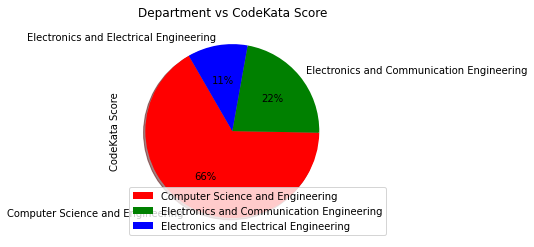

In [14]:
df.groupby(['Department']).sum().plot(kind = 'pie', y = 'CodeKata Score', autopct = '%1.lf%%',
                                            colors = ['red', 'green', 'blue'], shadow = True, startangle = 120,
                                     title = 'Department vs CodeKata Score')

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

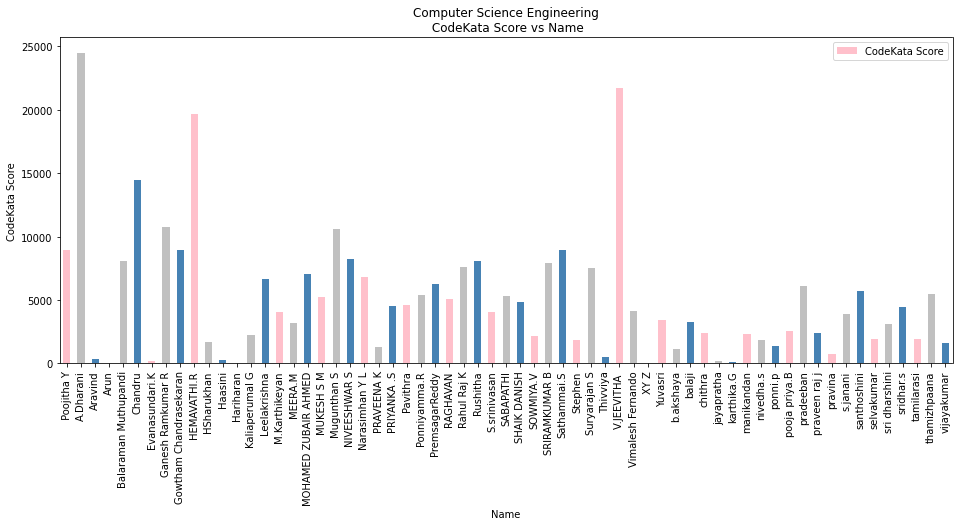

In [15]:
# Computer Science Department
df[df['Department'] == 'Computer Science and Engineering'].groupby(['Name']).max().plot(kind = 'bar', y = 'CodeKata Score',
                                            color = ['pink', 'silver', 'steelblue'], figsize = (16, 6))

plt.title('Computer Science Engineering\n CodeKata Score vs Name')
plt.xlabel('Name')
plt.ylabel('CodeKata Score')
plt.show()

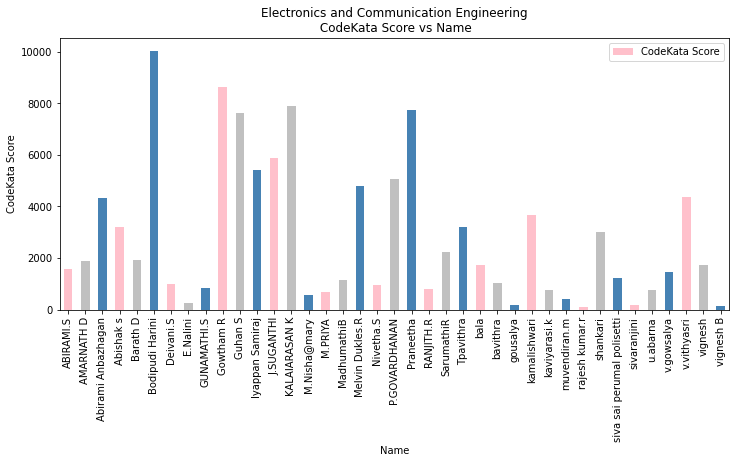

In [16]:
# Electronics and Communication Department
df[df['Department'] == 'Electronics and Communication Engineering'].groupby(['Name']).max().plot(kind = 'bar', y = 'CodeKata Score',
                                            color = ['pink', 'silver', 'steelblue'], figsize = (12, 5))

plt.title('Electronics and Communication Engineering\n CodeKata Score vs Name')
plt.xlabel('Name')
plt.ylabel('CodeKata Score')
plt.show()

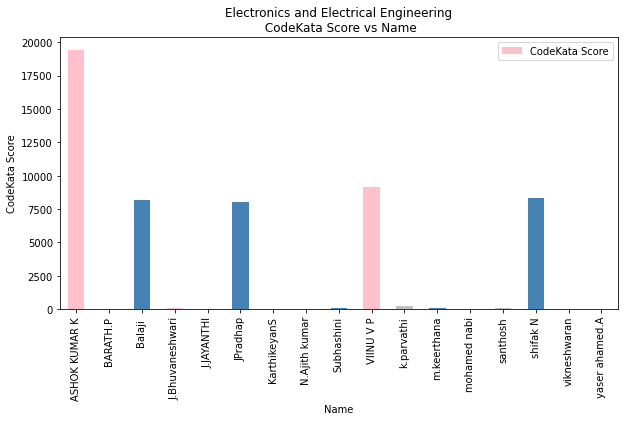

In [17]:
# Electronics and Electrical Department
df[df['Department'] == 'Electronics and Electrical Engineering'].groupby(['Name']).max().plot(kind = 'bar', y = 'CodeKata Score',
                                            color = ['pink', 'silver', 'steelblue'], figsize = (10, 5))

plt.title('Electronics and Electrical Engineering\n CodeKata Score vs Name')
plt.xlabel('Name')
plt.ylabel('CodeKata Score')
plt.show()